In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
rso_data = pd.read_csv('data\\rso_data_v2.txt', index_col=0)
norm_rso_data = pd.read_csv('data\\norm_rso_data.txt', index_col=0)

In [14]:
rso_data

,Year,Organization,Type,Designation,Standing,Allocation
0,2012,maganda magazine,PUB,Publications RSO,23,1592.02
1,2012,Threads,PUB,Publications RSO,12,1300.00
2,2012,Alternative Breaks,PUB,Service RSO,10,891.07
3,2012,BARE Magazine,PUB,Publications RSO,6,1250.00
4,2012,Berkeley Fiction Review,PUB,Publications RSO,29,1036.99
...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,SISG,Health & Wellness RSO,15,4300.00
3875,2020,Volunteer Income Tax Assistance Program,SISG,Service RSO,8,480.00
3876,2020,Volunteers Around the World at Berkeley,SISG,Service RSO,7,250.00
3877,2020,Wonderworks,SISG,Service RSO,10,0.00


In [15]:
norm_rso_data

,Year,Organization,Type,Designation,Standing,Allocation,Binned Standing,norm_by_y,norm_by_yd,norm_by_ys,norm_by_yds
0,2012,maganda magazine,PUB,Publications RSO,23,1592.02,9,-0.008281,0.036367,-1.205952,-0.112021
1,2012,Threads,PUB,Publications RSO,12,1300.00,7,-0.070396,-0.025748,0.018459,-0.318318
2,2012,Alternative Breaks,PUB,Service RSO,10,891.07,7,-0.157379,-0.181246,-0.068524,-0.080892
3,2012,BARE Magazine,PUB,Publications RSO,6,1250.00,5,-0.081032,-0.036383,0.123851,0.000000
4,2012,Berkeley Fiction Review,PUB,Publications RSO,29,1036.99,9,-0.126341,-0.081692,-1.324011,-0.230080
...,...,...,...,...,...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,SISG,Health & Wellness RSO,15,4300.00,8,0.416259,0.413214,0.353648,0.303370
3875,2020,Volunteer Income Tax Assistance Program,SISG,Service RSO,8,480.00,7,-0.196901,-0.293152,-0.234523,-0.045412
3876,2020,Volunteers Around the World at Berkeley,SISG,Service RSO,7,250.00,6,-0.233819,-0.330070,-0.060201,-0.012038
3877,2020,Wonderworks,SISG,Service RSO,10,0.00,7,-0.273947,-0.370198,-0.311569,-0.122458


In [16]:
rso_data[rso_data['Organization'].str.contains('Quidditch')]

,Year,Organization,Type,Designation,Standing,Allocation
559,2013,Quidditch League at Berkeley,SAG,Recreational RSO,1,150.0
1806,2016,Quidditch League at Berkeley,SAG,Recreational RSO,1,400.0
2266,2017,Quidditch League at Berkeley,SAG,Recreational RSO,9,0.0
2715,2018,Quidditch League at Berkeley,SAG,Recreational RSO,10,400.0
3203,2019,Quidditch League at Berkeley,SAG,Recreational RSO,11,0.0
3698,2020,Quidditch League at Berkeley,SAG,Recreational RSO,12,0.0


# Summary Statistics

<AxesSubplot:title={'center':'Total Allocations to RSOs by Year'}, xlabel='Year', ylabel='Allocation'>

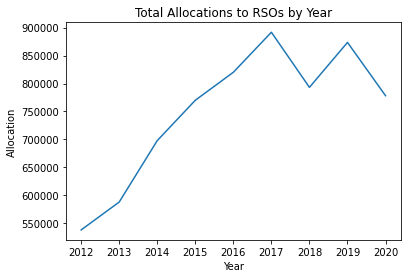

In [17]:
all_allocs = rso_data.groupby('Year').sum().reset_index()
all_rsos = rso_data.groupby('Year').count().reset_index()
holistic = pd.DataFrame([all_allocs['Year'], all_rsos['Organization'], all_allocs['Allocation']]).transpose()

holistic = holistic.astype({'Year': 'int32', 'Organization': 'int32'})

holistic['Avg per club'] = (holistic['Allocation'] / holistic['Organization']).apply(round, args=(2,))
holistic

plt.title('Total Allocations to RSOs by Year')
sns.lineplot(x='Year', y='Allocation', data=holistic)

In [18]:
bridges = ['bridges Multicultural Resource Center',
            'Indigenous and Native Coalition (INC) Recruitment and Retention Center',
            'Middle Eastern North African Recruitment and Retention Center',
            'Mixed Student Union',
            'Pilipinx Academic Student Services',
            'Raíces Recruitment and Retention Center',
            'REACH! Asian Pacific American Recruitment and Retention Center']

bridges_data = rso_data[rso_data['Organization'].isin(bridges)]
bridges_hol = bridges_data.groupby('Year').sum().reset_index()[['Year', 'Allocation']]

bridges_hol
# bridges_data[bridges_data['Year'] == 2018]
# bridges_data.sort_values(by=['Organization', 'Year'])

,Year,Allocation
0,2012,108486.25
1,2013,109563.00
2,2014,129000.00
3,2015,133000.00
4,2016,139200.00
5,2017,155866.00
6,2018,102240.00
7,2019,0.00
8,2020,0.00


<AxesSubplot:title={'center':'Number of RSOs by Type'}, xlabel='Year', ylabel='Count'>

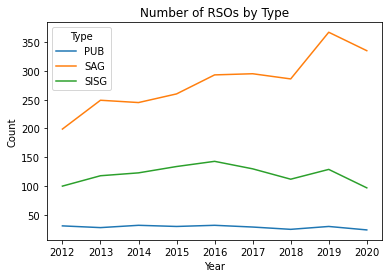

In [19]:
counts = pd.DataFrame(rso_data.groupby(['Year', 'Type']).size()).reset_index()
counts = counts.rename(columns={0: 'Count'})

plt.title('Number of RSOs by Type')
sns.lineplot(x='Year', y='Count', hue='Type', data=counts)

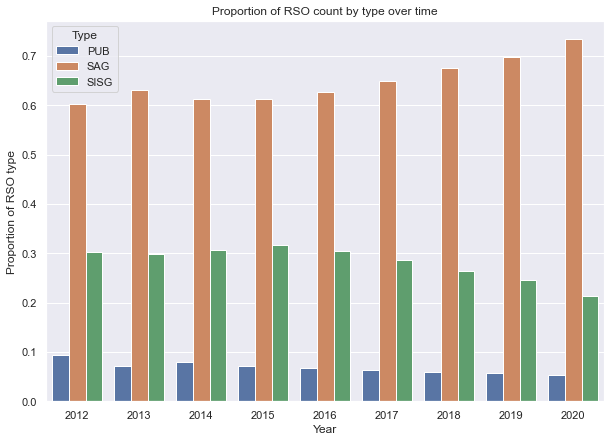

In [41]:
sns.set(rc={'figure.figsize':(10, 7)})

total = counts.groupby('Year').sum()
props = counts.copy(deep=True).rename(columns={'Count': 'Proportion of RSO type'})
rso_prop = []

for year in total.index:
    idx = counts[counts['Year'] == year].index
    total_count = total.loc[year, 'Count']

    for i in idx:
        rso_prop.append(counts.at[i, 'Count'] / total_count)

props['Proportion of RSO type'] = rso_prop
sns.barplot(x='Year', y='Proportion of RSO type', hue='Type', data=props).set_title('Proportion of RSO count by type over time')
plt.savefig('C:\\Users\\scher\\school\\senior-thesis\\images\\bar_prop_count_type_over_time.png',
            bbox_inches='tight')

<AxesSubplot:title={'center':'Allocations by RSO Type'}, xlabel='Year', ylabel='Allocation'>

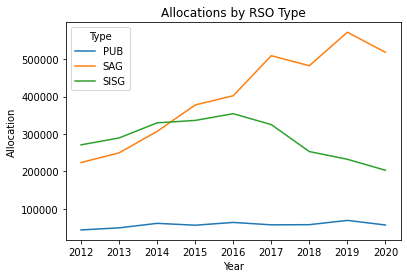

In [21]:
allocs = rso_data.groupby(['Year', 'Type']).sum().drop(columns=['Standing']).reset_index()

plt.title('Allocations by RSO Type')
sns.lineplot(x='Year', y='Allocation', hue='Type', data=allocs)

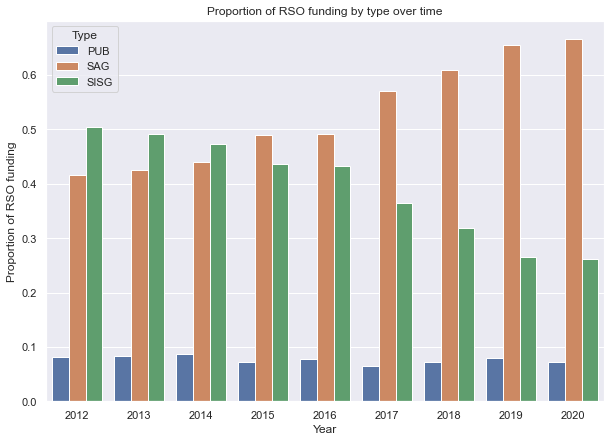

In [40]:
sns.set(rc={'figure.figsize':(10,7)})

alloc_totals = allocs.groupby('Year').sum()
alloc_props = allocs.copy(deep=True).rename(columns={'Allocation': 'Proportion of RSO funding'})
alloc_prop = []

for year in alloc_totals.index:
    idx = allocs[allocs['Year'] == year].index
    total_alloc = alloc_totals.loc[year, 'Allocation']
    
    for i in idx:
        alloc_prop.append(allocs.at[i, 'Allocation'] / total_alloc)

alloc_props['Proportion of RSO funding'] = alloc_prop
alloc_props

sns.barplot(x='Year', y='Proportion of RSO funding', hue='Type', 
            data=alloc_props).set_title('Proportion of RSO funding by type over time')
plt.savefig('C:\\Users\\scher\\school\\senior-thesis\\images\\bar_prop_funding_type_over_time.png',
            bbox_inches='tight')

<AxesSubplot:title={'center':'Number of RSOs by Designation'}, xlabel='Year', ylabel='Count'>

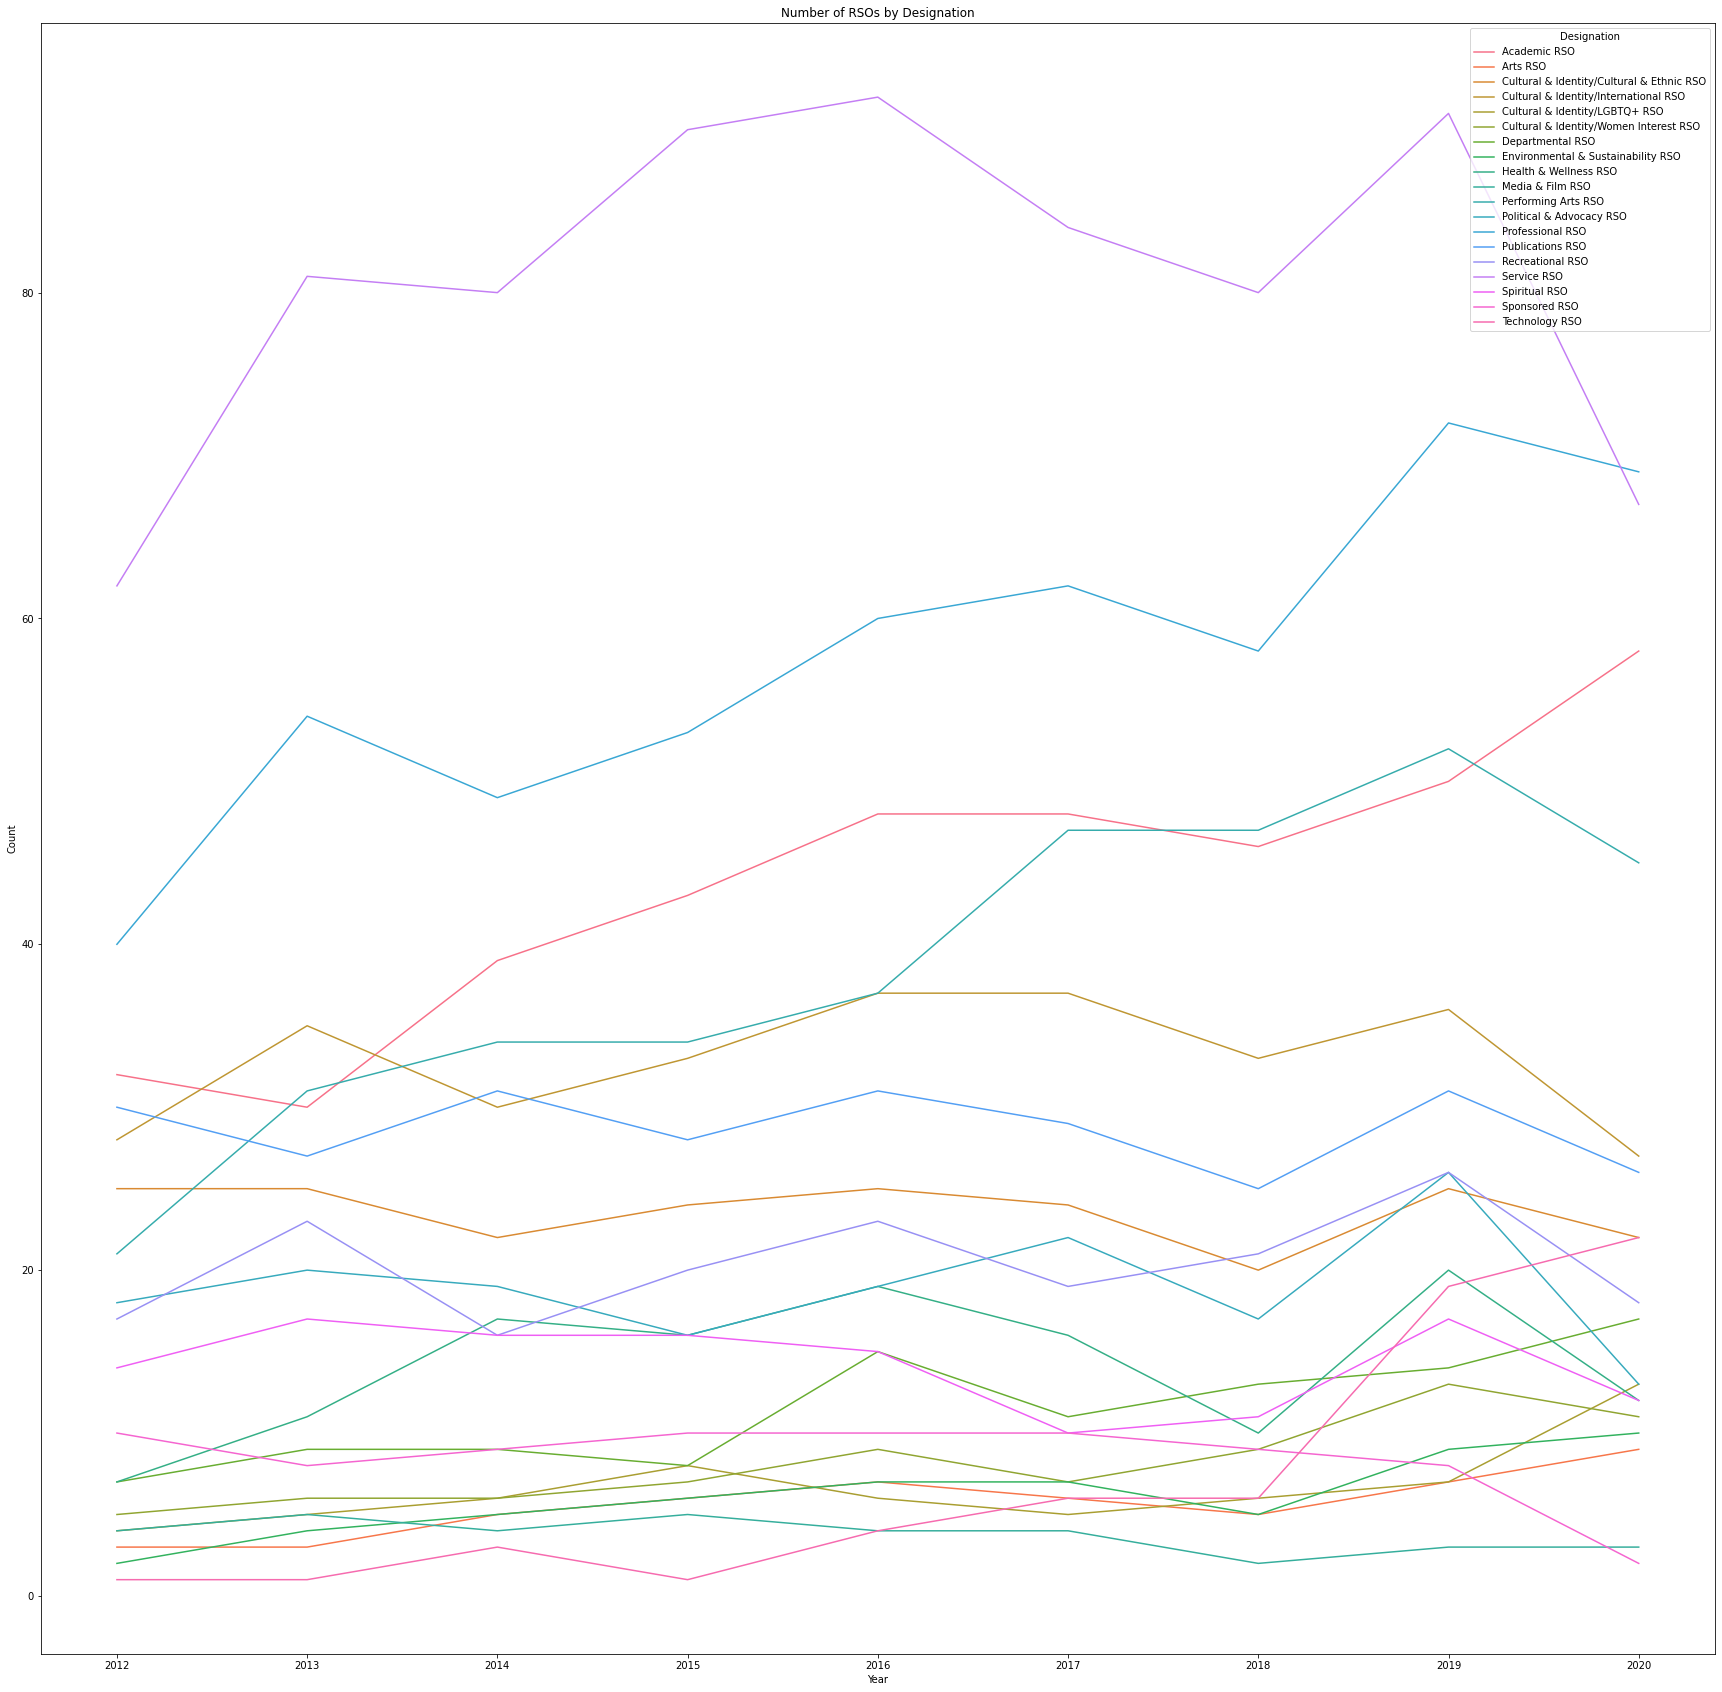

In [23]:
sns.set(rc={'figure.figsize':(15,8.27)})

specific_counts = pd.DataFrame(rso_data.groupby(['Year', 'Designation']).size()).reset_index()
specific_counts = specific_counts.rename(columns={0: 'Count'})

plt.figure(figsize=(30,30))
plt.title('Number of RSOs by Designation')
sns.lineplot(x='Year', y='Count', hue='Designation', data=specific_counts)

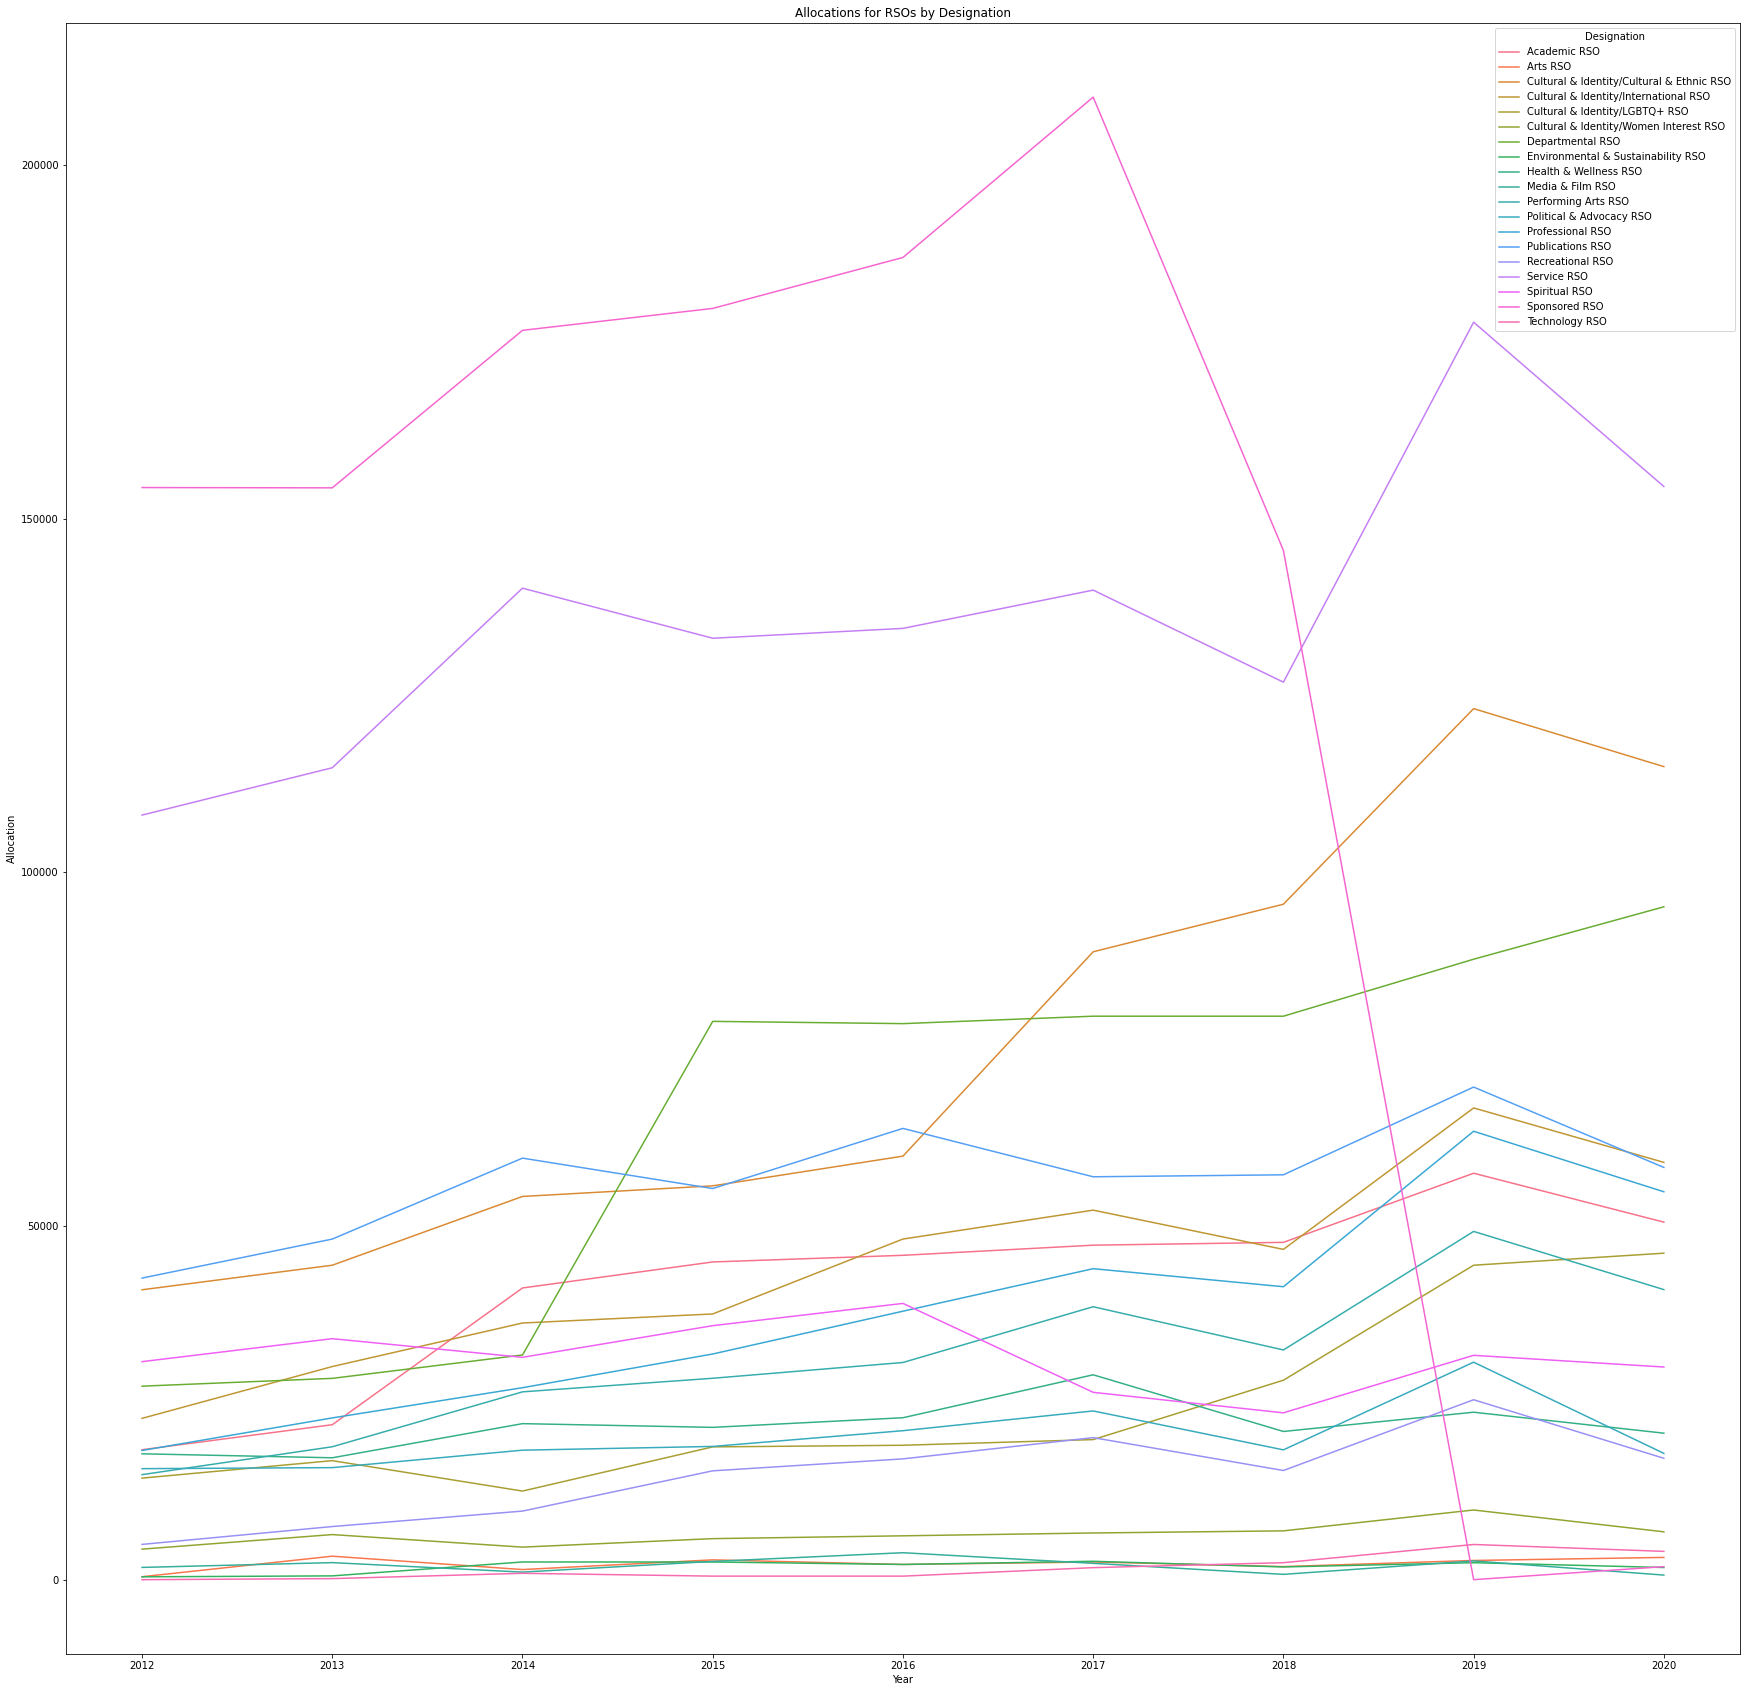

In [24]:
specific_allocs = rso_data.groupby(['Year', 'Designation']).sum().drop(columns=['Standing']).reset_index()
# specific_allocs['Allocation'] = normalize(specific_allocs['Allocation'].to_numpy().reshape(-1,1))
plt.figure(figsize=(30,30))
plt.title('Allocations for RSOs by Designation')
plot = sns.lineplot(x='Year', y='Allocation', hue='Designation', data=specific_allocs)
# save = plot.get_figure(
# save.savefig('output.png')

# Standing vs. allocation boxplots, grouped by designation

In [7]:
rso_2019 = rso_data[rso_data['Year']==2019]

# Save an order of RSO designations so graphs can more easily be compared.
rso_order = rso_2019['Designation'].unique()

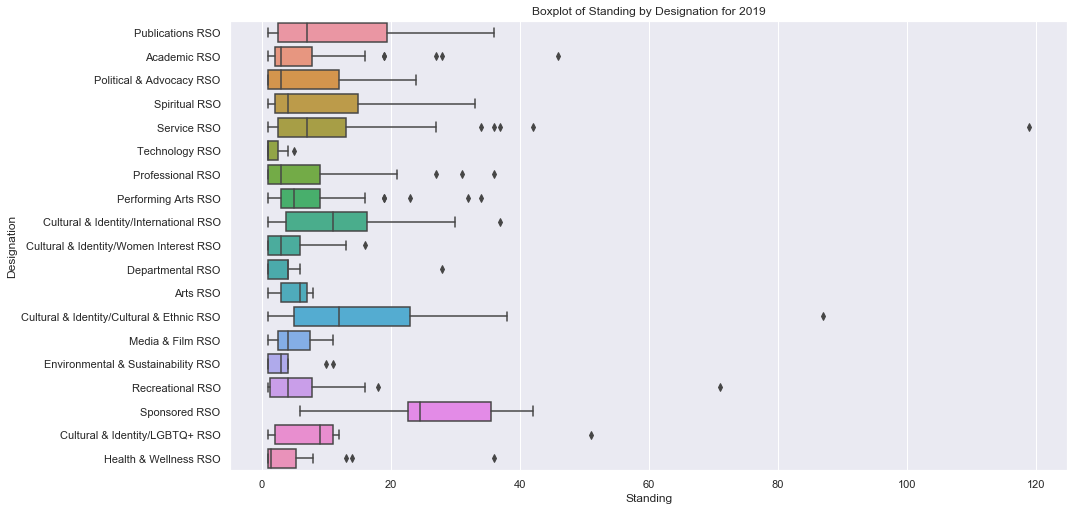

In [21]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(x='Standing', 
            y='Designation', 
            data=rso_2019, 
            order=rso_order).set_title('Boxplot of Standing by Designation for 2019')

plt.savefig('C:\\Users\\scher\\school\\senior-thesis\\images\\bp_standing_by_desig_2019.png',
            bbox_inches='tight')

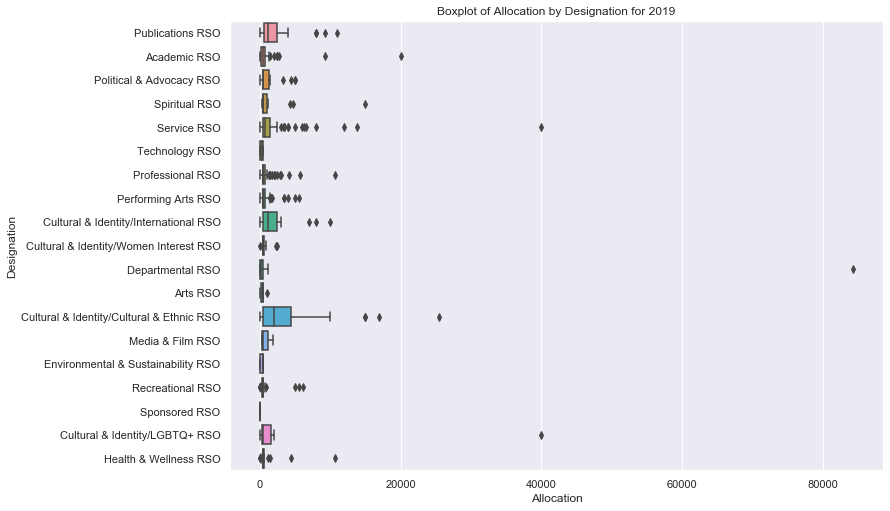

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Allocation', 
            y='Designation', 
            data=rso_2019, 
            order=rso_order).set_title('Boxplot of Allocation by Designation for 2019')

plt.savefig('C:\\Users\\scher\\school\\senior-thesis\\images\\bp_alloc_by_desig_2019.png',
            bbox_inches='tight')

Unfortunately, the outliers make the boxplots a little hard to compare; we'll remove them with seaborn's `showfliers` option.

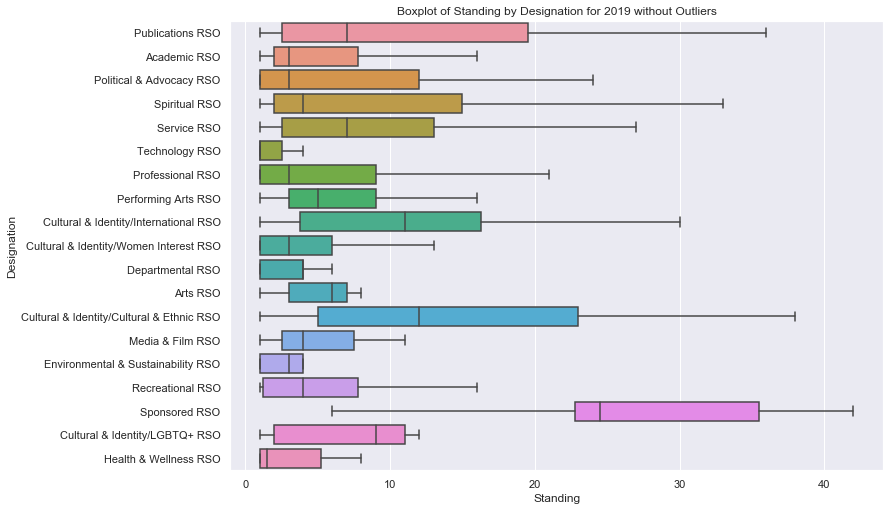

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Standing', 
            y='Designation', 
            data=rso_2019, 
            order=rso_order, 
            showfliers=False).set_title('Boxplot of Standing by Designation for 2019 without Outliers')

plt.savefig('C:\\Users\\scher\\school\\senior-thesis\\images\\bp_standing_by_desig_no_outliers_2019.png',
            bbox_inches='tight')

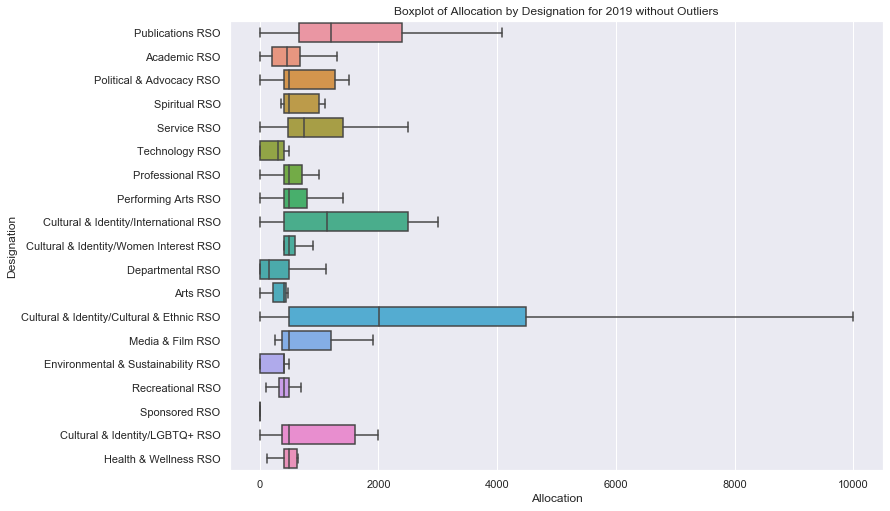

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Allocation', 
            y='Designation', 
            data=rso_2019, 
            order=rso_order, 
            showfliers=False).set_title('Boxplot of Allocation by Designation for 2019 without Outliers')

plt.savefig('C:\\Users\\scher\\school\\senior-thesis\\images\\bp_alloc_by_desig_no_outliers_2019.png',
            bbox_inches='tight')

Do these trends exist in other budget years?

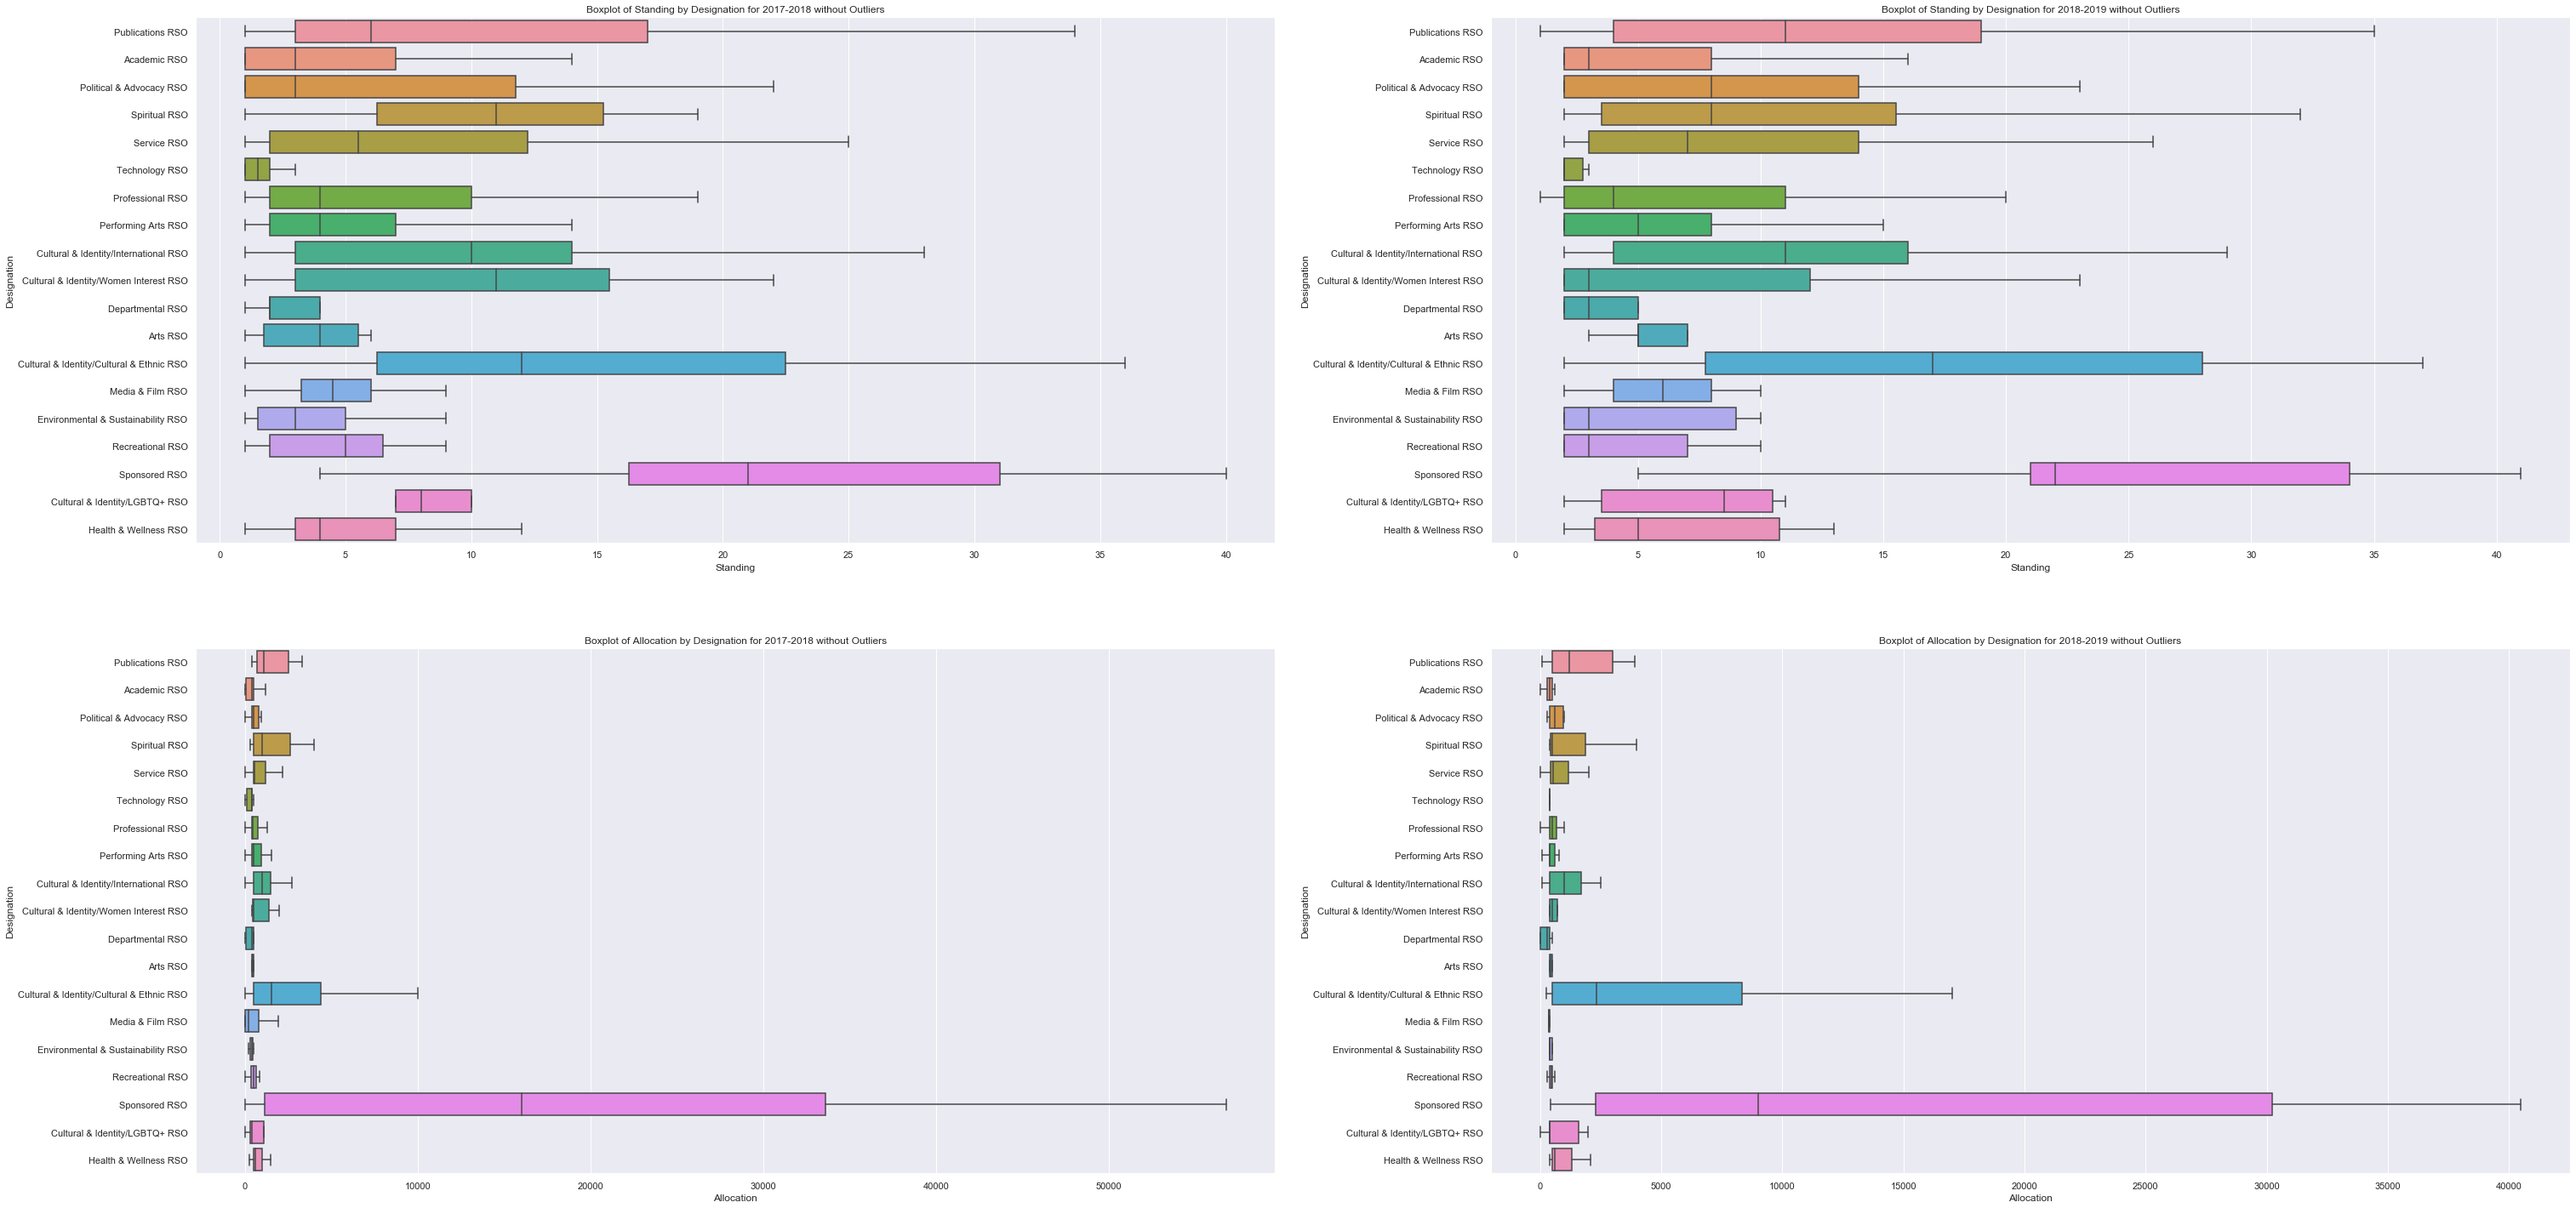

In [25]:
sns.set(rc={'figure.figsize':(50,25)})

# The years we want to plot can be edited by adding to the following array. That said, the figure size (in the line above)
# must be adjusted accordingly.
years = [2017, 2018]

fig, ax = plt.subplots(len(years),2)

for i, year in enumerate(years):
    data = rso_data[rso_data['Year']==year]
    
    sns.boxplot(x='Standing', 
                y='Designation', 
                data=data, 
                order=rso_order, 
                showfliers=False, 
                ax=ax[0][i]).set_title(f'Boxplot of Standing by Designation for {year}-{year+1} without Outliers')
    sns.boxplot(x='Allocation', 
                y='Designation', 
                data=data, 
                order=rso_order, 
                showfliers=False, 
                ax=ax[1][i]).set_title(f'Boxplot of Allocation by Designation for {year}-{year+1} without Outliers')
    
fig.savefig('C:\\Users\\scher\\school\\senior-thesis\\images\\bp_standing_alloc_by_desig_no_outliers_2017_18.png',
            bbox_inches='tight')

# Normalized Data Viz

In [42]:
norm_rso_data

,Year,Organization,Type,Designation,Standing,Allocation,Binned Standing,norm_by_y,norm_by_yd,norm_by_ys,norm_by_yds
0,2012,maganda magazine,PUB,Publications RSO,23,1592.02,9,-0.008281,0.036367,-1.205952,-0.112021
1,2012,Threads,PUB,Publications RSO,12,1300.00,7,-0.070396,-0.025748,0.018459,-0.318318
2,2012,Alternative Breaks,PUB,Service RSO,10,891.07,7,-0.157379,-0.181246,-0.068524,-0.080892
3,2012,BARE Magazine,PUB,Publications RSO,6,1250.00,5,-0.081032,-0.036383,0.123851,0.000000
4,2012,Berkeley Fiction Review,PUB,Publications RSO,29,1036.99,9,-0.126341,-0.081692,-1.324011,-0.230080
...,...,...,...,...,...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,SISG,Health & Wellness RSO,15,4300.00,8,0.416259,0.413214,0.353648,0.303370
3875,2020,Volunteer Income Tax Assistance Program,SISG,Service RSO,8,480.00,7,-0.196901,-0.293152,-0.234523,-0.045412
3876,2020,Volunteers Around the World at Berkeley,SISG,Service RSO,7,250.00,6,-0.233819,-0.330070,-0.060201,-0.012038
3877,2020,Wonderworks,SISG,Service RSO,10,0.00,7,-0.273947,-0.370198,-0.311569,-0.122458


<AxesSubplot:xlabel='Standing', ylabel='norm_by_yd'>

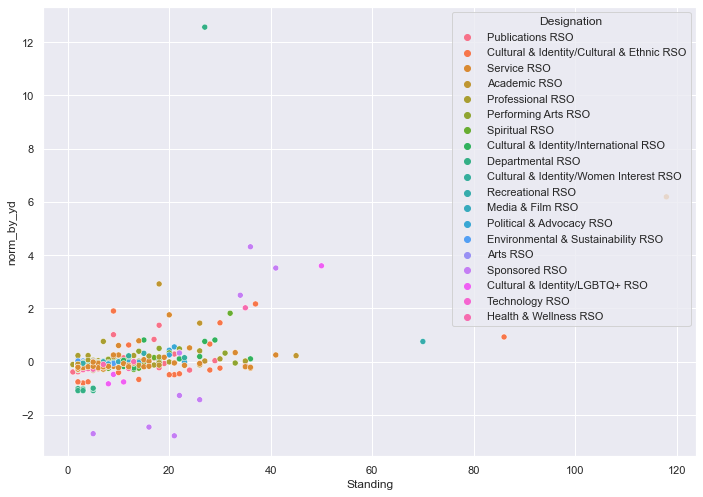

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='Standing', y='norm_by_yd', hue='Designation', data=norm_rso_data[norm_rso_data['Year']==2018])

In [44]:
df_2018 = norm_rso_data[norm_rso_data['Year'] == 2018]
df_dummies = pd.get_dummies(df_2018, columns=['Designation'])

X = df_dummies.drop(columns=['Year', 'Organization', 'Standing', 'Allocation', 'norm_by_yd'])

k_vals = []
inertias = []

for i in np.arange(2, 40):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    k_vals.append(i)
    inertias.append(kmeans.inertia_)
    
plt.plot(k_vals, inertias)

ValueError: could not convert string to float: 'PUB'

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

df_2018['label'] = kmeans.labels_

plt.figure(figsize=(20,20))
sns.scatterplot(data=df_2018, x='Standing', y='Allocation', hue='label')

# Clustering

In [ ]:
df_2018 = rso_data[rso_data['Year'] == 2018]
df_dummies = pd.get_dummies(df_2018, columns=['Type', 'Designation'])

X = df_dummies[['Standing', 'Allocation']]
X.loc[:] = normalize(X.loc[:])

k_vals = []
inertias = []

for i in np.arange(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    k_vals.append(i)
    inertias.append(kmeans.inertia_)
    
plt.plot(k_vals, inertias)

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

df_2018['label'] = kmeans.labels_

plt.figure(figsize=(20,20))
sns.scatterplot(data=df_2018, x='Standing', y='Allocation', hue='label')

# Misc

In [ ]:
rso_18 = rso_data[rso_data['Year'] == 2018]
allocs_18 = rso_18.groupby('Designation').sum()[['Allocation']]
clubs_18 = rso_18.groupby('Designation').count()[['Organization']]
allocs_18['Allocation'] / clubs_18['Organization']
# rso_18[rso_18['Designation'].str.contains('Ethnic')]

In [ ]:
rso_data.loc[rso_data[rso_data['Year']==2019].groupby('Designation').Allocation.agg('idxmax')]

In [ ]:
rso_data[(rso_data['Year']==2019) &
         (rso_data['Designation']=='Political & Advocacy RSO')].sort_values('Allocation', ascending=False)

In [ ]:
rso_data[rso_data['Year']==2017].sort_values('Allocation', ascending=False)

# Cultural RSOs are awarded the most $$, it seems
rso_data[rso_data['Organization']=='Korean American Student Association']